**CS5002: Programming Principles and Practice**

**Practical P3: Data analysis and visualisation Python**

Introduction

The project focuses on the some easy requirements, and attempts the medium requirement. 

The project reads the provided CSV data file and produces a "refined"/ cleaned CSV file. I used pandas documentation to clean the data file, by using predefined functions, NAN values, the merge function and printing the analysis of the data file. I attempted the bar chart and the pie charts, aswell as the group_by requirement.

Demonstration of programme.

In [193]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

Demonstrating data cleaning.

In [194]:
csv_path =  r'C:\Users\Emmie\OneDrive - University of St Andrews\CS5002_P3\data\refined_Scotland_teaching_file_1PCT.csv' 
df = pd.read_csv(csv_path)

In [195]:
df

,Unnamed: 0,Record_Number,Region,RESIDENCE_TYPE,Family_Composition,sex,age,Marital_Status,student,Country_Of_Birth,health,Ethnic_Group,religion,Economic_Activity,Occupation,industry,Hours_Worked_Per_Week,Approximate_Social_Grade
0,0,1,S92000003,P,1,1,4,2,2,2,2,1,5,1,5,5,4,3
1,1,2,S92000003,P,0,1,3,1,2,1,2,1,1,1,1,8,3,2
2,2,3,S92000003,P,1,2,4,2,2,1,3,1,1,1,4,8,2,4
3,3,4,S92000003,P,1,2,6,2,2,1,1,1,1,1,2,8,4,2
4,4,5,S92000003,P,4,2,4,4,2,1,2,1,1,1,3,11,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63383,63383,63384,S92000003,P,1,1,2,1,1,1,1,1,2,6,X,X,X,3
63384,63384,63385,S92000003,P,1,1,4,2,2,1,1,1,1,1,3,9,3,2
63385,63385,63386,S92000003,P,1,1,5,2,2,1,1,1,9,1,8,3,4,4
63386,63386,63387,S92000003,P,4,2,1,1,1,1,1,1,9,X,X,X,X,X


Next, we read the JSON file with the interpretations of categories.

In [196]:
json_path = r'C:\Users\Emmie\OneDrive - University of St Andrews\CS5002_P3\data\data_dictionary.json'
with open(json_path, 'r') as read_file:
    labels = json.load(read_file)

In [197]:
labels

{'RESIDENCE_TYPE': {'C': 'Resident in a Communal Establishment',
  'P': 'Not resident in a Communal Establishment'},
 'Family_Composition': {'0': 'Not in a family',
  '1': 'Married/same-sex civil partnership couple family',
  '2': 'Cohabiting couple family',
  '3': 'Lone parent family (male head)',
  '4': 'Lone parent family (female lead)',
  '5': 'Other related family',
  'X': 'No code required (residents of a communal establishment)'},
 'Sex': {'1': 'Male', '2': 'Female'},
 'Ethnic_Group': {'1': 'White',
  '2': 'Mixed or multiple ethnic group',
  '3': 'Asian',
  '4': 'African',
  '5': 'Caribbean or black',
  '6': 'Other ethnic group'},
 'Age': {'1': '0 to 15',
  '2': '16 to 24',
  '3': '25 to 34',
  '4': '35 to 44',
  '5': '45 to 54',
  '6': '55 to 64',
  '7': '65 to 74',
  '8': '75 and over'},
 'Marital_Status': {'1': 'Single(Never married or never registered a same-sex civil partnership)',
  '2': ' Married or in a same sex-civil partnership',
  '3': 'Separated, but still legally ma

In [198]:
labels['Family_Composition']['0']

'Not in a family'

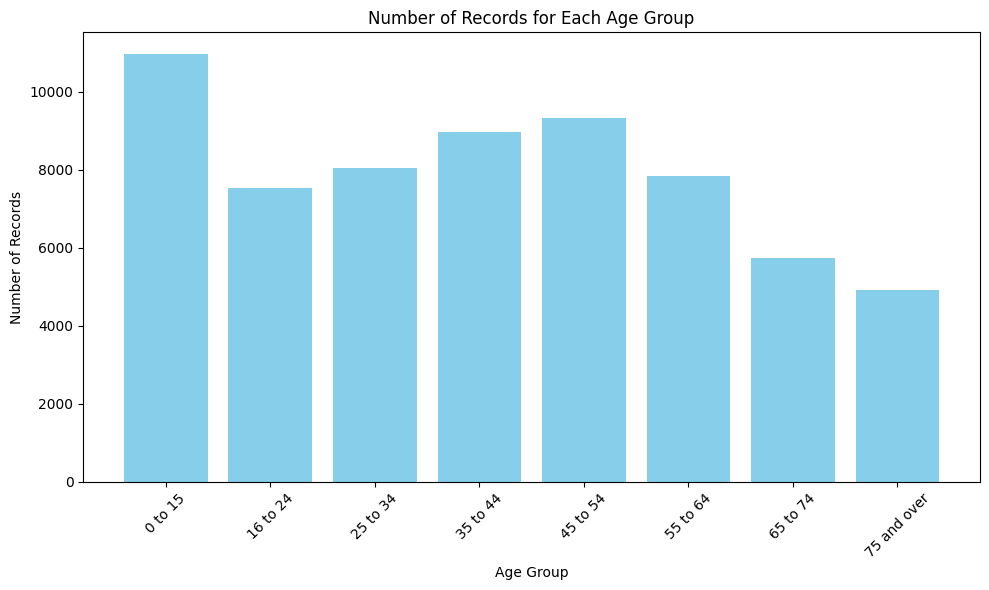

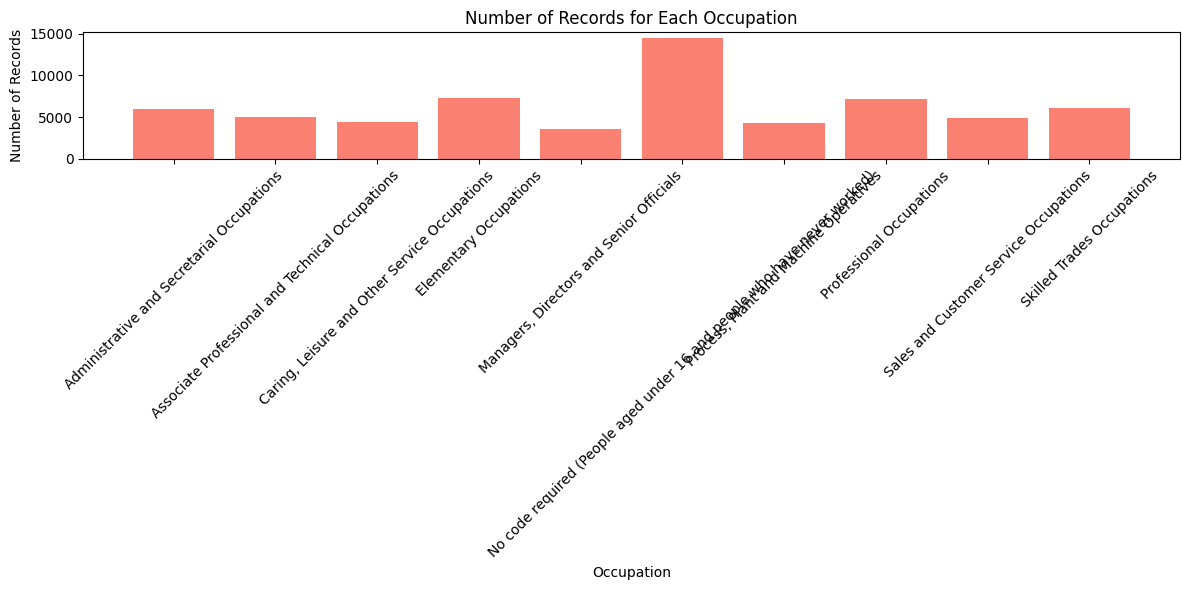

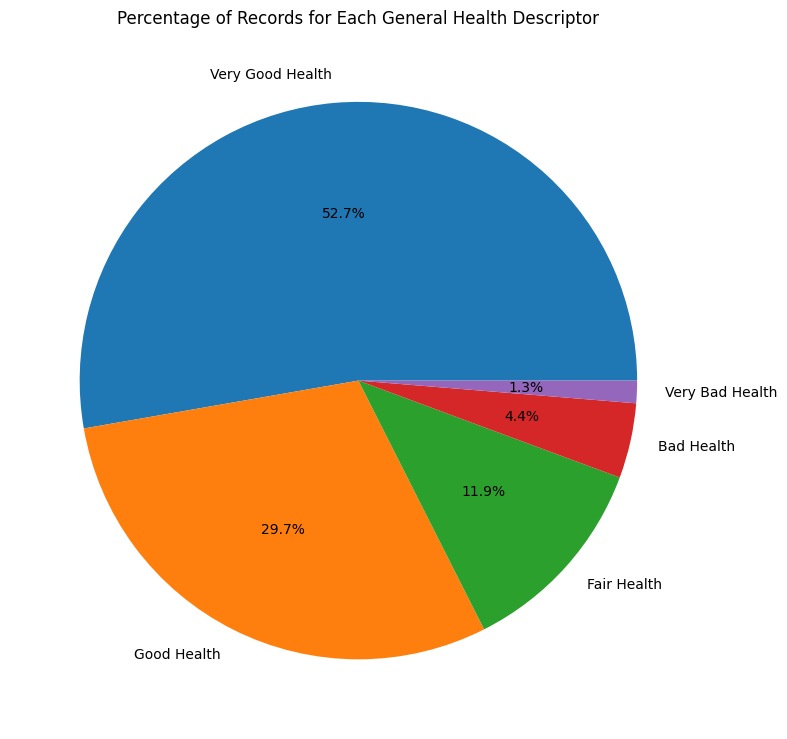

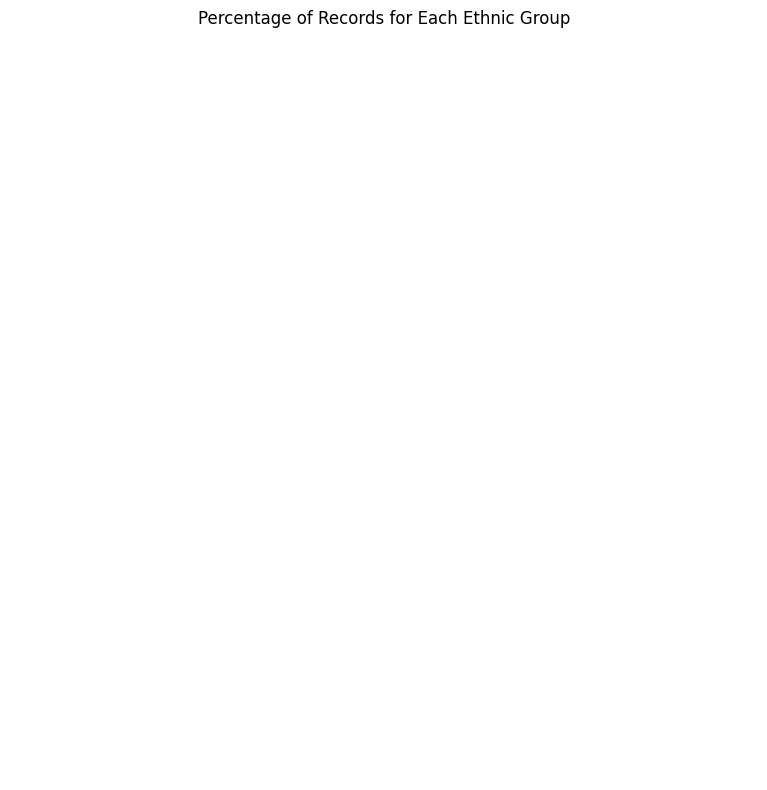

In [199]:
sys.path.append(os.path.abspath(r"C:\Users\Emmie\OneDrive - University of St Andrews\CS5002_P3\code"))

from visualisations import print_bar_age, print_bar_occupation, print_pie_health, print_pie_ethnic_group, generate_graphs

print_bar_age()           
print_bar_occupation()    
print_pie_health()        
print_pie_ethnic_group()  

In [200]:
from data_cleaning import descriptive_analysis

print(descriptive_analysis(df))

Hello World!

descriptive analysis
total number of records= 63388

data types for each variable
Unnamed: 0                   int64
Record_Number                int64
Region                      object
RESIDENCE_TYPE              object
Family_Composition          object
sex                          int64
age                          int64
Marital_Status               int64
student                      int64
Country_Of_Birth             int64
health                       int64
Ethnic_Group                 int64
religion                     int64
Economic_Activity           object
Occupation                  object
industry                    object
Hours_Worked_Per_Week       object
Approximate_Social_Grade    object
dtype: object

column: Unnamed: 0
Unnamed: 0
63387    1
0        1
1        1
2        1
3        1
        ..
16       1
15       1
14       1
13       1
12       1
Name: count, Length: 63388, dtype: int64

column: Record_Number
Record_Number
63388    1
1        1
2       

In [201]:
hours_industry_group = df.groupby(['Hours_Worked_Per_Week', 'industry']).size().reset_index(name='Record_Count')
print("Number of records by hours worked per week and industry:")
print(hours_industry_group)

occupation_social_grade_group = df.groupby(['Occupation', 'Approximate_Social_Grade']).size().reset_index(name='Record_Count')
print("\nnumber of records by occupation/approximate social grade:")
print(occupation_social_grade_group)


Number of records by hours worked per week and industry:
   Hours_Worked_Per_Week industry  Record_Count
0                      1        1            21
1                      1       10           230
2                      1       11           259
3                      1       12           103
4                      1       13            83
..                   ...      ...           ...
61                     X        6          1324
62                     X        7           556
63                     X        8          1588
64                     X        9          1116
65                     X        X         14435

[66 rows x 3 columns]

number of records by occupation/approximate social grade:
   Occupation Approximate_Social_Grade  Record_Count
0           1                        1          1413
1           1                        2          1686
2           1                        3           213
3           1                        4           192
4           1       

**A description of any known problems with your project, e.g. any Basic or Additional Require
ments that are not met, but were attempted to be implemented**



I attempted the medium requirement, however did not have time to execute it.

The pie graph for ethnicity is not working, I still cant figure out why however I have ran out of time.

**Details about any specific problems you encountered which you were able to solve, and how
 you solved them;**

I overcomplicated this assignment severely, to emulate reproducability, I attempted to use lambda from stackoverflow snippets aswell as experimenting with dictionaries. This did not bode well, and I had to re-evaluate my approach sticking specifically to the pandas documentation referenced. These are the main problems I had, I had more syntax errors, however these are "major" setbacks.

**Problem 1: CSV File, DataFrame Empty**
  df = pd.read_csv('data\Scotland_teaching_file_1PCT.csv')

  
C:\Users\Emmie\OneDrive - University of St Andrews\CS5002_P3\initialscript.py:12: SyntaxWarning: invalid escape sequence '\d'
  with open("data\data_dictionary.json", "r") as jsonfile:
Hello World!
Empty DataFrame
Columns: [Record_Number, Region, RESIDENCE_TYPE, Family_Composition, sex, age, Marital_Status, student, Country_Of_Birth, health, Ethnic_Group, religion, Economic_Activity, Occupation, industry, Hours_Worked_Per_Week, Approximate_Social_Grade]
Index: []
['C:\\Users\\Emmie\\OneDrive - University of St Andrews\\CS5002_P3\\initialscript.py']
PS C:\Users\Emmie\OneDrive - University of St Andrews\CS5002_P3> 

I had this issue for a long time, the CSV file wasnt being regognised with any data in it. This is because I was wasnt using an R string, when I implimented this, the file was able to be read.
I was then having problems with the file being loaded.

Exception has occurred: TypeError
load_df() missing 1 required positional argument: 'file_path'
  File "C:\Users\Emmie\OneDrive - University of St Andrews\CS5002_P3\initialscript.py", line 106, in clean_data
    df = load_df()
         ^^^^^^^^^
  File "C:\Users\Emmie\OneDrive - University of St Andrews\CS5002_P3\initialscript.py", line 124, in <module>
    result_summary = clean_data(input_file, output_file)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: load_df() missing 1 required positional argument: 'file_path'

I tried to redefine these, instead of directly loading the files and printing the subsequent results/refined csv file. file_path was not being regognised, as the csv file was in the wrong directory/wasnt navigating to \data. 

**Problem 2: Value errors in DataFrame**

![Screenshot 2024-11-27 143731.png](<attachment:Screenshot 2024-11-27 143731.png>)


Value error: The json file doesnt have a two dimensional array, I scrapped this section as I had taken the code snippet from a dataframe tutorial. I decided to define the data frmes as df, where df is the csv file directly, as demonstrated on the provided jupyter notebook.

**Problem 3: Lambda Issues**

  File "c:\Users\Emmie\.vscode\extensions\ms-python.debugpy-2024.12.0-win32-x64\bundled\libs\debugpy\_vendored\pydevd\_pydevd_bundle\pydevd_runpy.py", line 283, in _get_code_from_file
    code = compile(f.read(), fname, "exec")
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Emmie\OneDrive - University of St Andrews\CS5002_P3\initialscript.py", line 42
    df[column]=df[column].apply(lambda row: min_val<= row[] max_val) #error
                                            ^^^^^^^^^^^^^^^
SyntaxError: invalid syntax. Perhaps you forgot a comma?
PS C:\Users\Emmie\OneDrive - University of St Andrews\CS5002_P3> 

I used this tutorial, https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/, which worked for missing values, however I could not figure out how to apply this to a range of a dictionary. There was some stack overflow examples however this logic wasnt applicable, I decided to abandon this phase and reread the tutorials, pandas documentation and used the following youtube videos:

I treid to use lambda for mapping, and replacing NAN values. 

def mapping_values(df, data_dict):
    for column, mapping in data_dict.items():
        if column in df.columns:
            valid_values = list(mapping.keys())
            df[column] = df[column].apply(lambda x: x if str(x) in valid_values else np.nan) #https://stackoverflow.com/questions/44061607/pandas-lambda-function-with-nan-support
            print(f"Validated values in column '{column}'.")
    return df #put this in duplicates?

This did work, however when i ran the file, df was no longer regognised. This is why I restarted my programming from the beggining, and used automated predefined pandas concepts.

Exception has occurred: UnboundLocalError
cannot access local variable 'df' where it is not associated with a value
  File "C:\Users\Emmie\OneDrive - University of St Andrews\CS5002_P3\code\data_cleaning.py", line 104, in clean_data
    print(f"Total number of records: {len(df)}")
                                          ^^
  File "C:\Users\Emmie\OneDrive - University of St Andrews\CS5002_P3\code\data_cleaning.py", line 116, in <module>
    clean_data()
UnboundLocalError: cannot access local variable 'df' where it is not associated with a value

**Problem 4:NAN issues:**

Exception has occurred: AttributeError
'function' object has no attribute 'replace'
  File "C:\Users\Emmie\OneDrive - University of St Andrews\CS5002_P3\initialscript.py", line 88, in missing_value_check
    df.replace('', np.nan) #from #https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
    ^^^^^^^^^^
  File "C:\Users\Emmie\OneDrive - University of St Andrews\CS5002_P3\initialscript.py", line 106, in clean_data
    df, columns_with_missing, nan_values = missing_value_check(df)
                                           ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Emmie\OneDrive - University of St Andrews\CS5002_P3\initialscript.py", line 124, in <module>
    result_summary = clean_data(input_file, output_file)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'function' object has no attribute 'replace'

**Problem 5:Expected Types Error**

Exception has occurred: UnboundLocalError
cannot access local variable 'df' where it is not associated with a value
  File "C:\Users\Emmie\OneDrive - University of St Andrews\CS5002_P3\initialscript.py", line 30, in get_expected_types_from_data_dictionary
    df = df.infer_objects()
         ^^
  File "C:\Users\Emmie\OneDrive - University of St Andrews\CS5002_P3\initialscript.py", line 108, in clean_data
    expected_types = get_expected_types_from_data_dictionary(df)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Emmie\OneDrive - University of St Andrews\CS5002_P3\initialscript.py", line 124, in <module>
    result_summary = clean_data(input_file, output_file)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnboundLocalError: cannot access local variable 'df' where it is not associated with a value

I tried to filter expected types, as defined in the spec. using this, as defined in pandas tutorial:

df = pd.read_csv('data/Scotland_teaching_file_1PCT.csv')

expected_types = get_expected_types_from_data_dictionary(df)
    df = df.infer_objects().....

This did not work, as df would not be regognise, I havent figured out why it wouldnt work, so I scrapped this methodlogy.

**Problem 6: Duplicated Error**

Exception has occurred: AttributeError
'NoneType' object has no attribute 'duplicated'
  File "C:\Users\Emmie\OneDrive - University of St Andrews\CS5002_P3\initialscript.py", line 79, in duplicate_check
    duplicate_rows= df[df.duplicated()]
                       ^^^^^^^^^^^^^
  File "C:\Users\Emmie\OneDrive - University of St Andrews\CS5002_P3\initialscript.py", line 109, in clean_data
    df, duplicate_rows = duplicate_check(df)
                         ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Emmie\OneDrive - University of St Andrews\CS5002_P3\initialscript.py", line 122, in <module>
    result_summary = clean_data(input_file, output_file)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'duplicated'

When I used the existing pandas documentation, dupplicated, which is cited as being popular to use. As the NAN values were making the whole csv file "none", which I figured out later on, I also scrapped this when it would have been reasonable methodology. 

**Problem 7: Mapping Issues**

#def mapping_values(df, data_dict):
    for column, mapping in data_dict.items():
        if column in df.columns:
            valid_values = list(mapping.keys())
    #        df[column] = df[column].where(df[column].isin(valid_values), np.nan)
     #       print(f"validated values in column '{column}'")
    #return df


    i mapped the values and transformed them into the literary values, inorder to create the bargraph and import labels easily, but this was redundant so it was cut., I decided to include most of the mapping within the visualisation file instead.

    **Problem 8: Overcomplicating Admissable**

    I worked on this for a couple days, but could not get it to run, I still dont understand fully why.

    #for column, admissable in data_dict.items(): # Changes range_or_list to just refer to data_dict, to directly load what is admissible
      #  if column in df.columns:
       #     try:
        #        if isinstance(admissable, tuple):
         #           min_val, max_val = admissable
          #          df[column] = df[column].between(min_val, max_val, inclusive='both').replace({False: np.nan}) #https://stackoverflow.com/questions/29247712/how-to-replace-a-value-in-pandas-with-nan
           #         print(f"Column '{column}' values checked within range ({min_val}, {max_val})")
             #   elif isinstance(admissable, list):
            #        df[column] = df[column].where(df[column].isin(admissable), np.nan)
              #      print(f"Column '{column}' values checked against admissible list.")
            #except ValueError as error:
            #    print(f"Error checking columns for admissible values: {error}")

                # no admissable returns are being returned in terminal, redo, should map to json to get range of possible values?

    **Problem 9: Mapping within visualisations**
This took a while to figure out, as the types were not mapping correctly to the barchart/pie charts. In order to do this I found a way to incorporate a dictionary, this is probably more complicated than it needs to be, but did the job. 


    age_mapping = {int(k): v for k, v in data_dict["Age"].items()} #https://stackoverflow.com/questions/44390818/how-to-insert-key-value-pair-into-dictionary-at-a-specified-position 



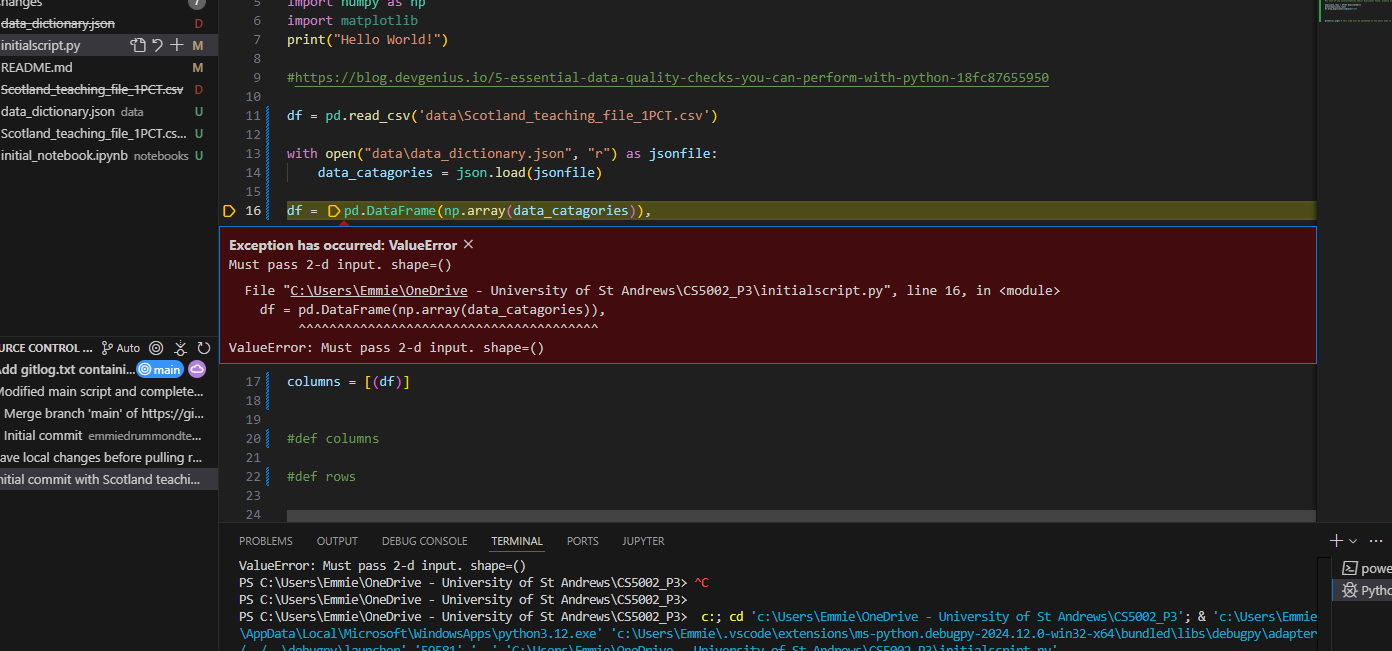

Anotate on how your design decisions contribute to the reproducibility and reusability of your analysis

**The data_cleaning file**


 **Decision 1:**

 File paths are adjustable within the data_cleaning file, i defined the URLs at the end of the code, so people can adjust the CSV and the json/data_dict accoridngly.

 **Decision 2**

I replaced missing values with NAN within the data_cleaning file, even though there are no missing values in the CSV. This is so if another CSV file is used, missing values will be replaced.

**Decision 3**

I seperated all of the cleaning stages and named them explicitly, so people who want to use the file can clearly read the steps and understand the script.

**Decision 4**

Drop_duplicates, merge and loc, are standard pandas methods, instead of using lambda, which makes it more reproducable as people are more aware of standard methods.


**Visualisation file**

I didnt make this file extremely reproducable, I should have put an input fot the types one wanted to illustrate within the bar graphs. A user could call different types by altering the code themselves. I incorporated alot of error handling in order to identify if a type was not correctly mapped, to improve reproducability.




**an accurate summary of provenance, i.e. stating which files or code fragments were:**
 1. **written by you;**
 2. **modified by you from the course material;**
 3. **sourced from elsewhere and who wrote them**


 Most of the predefined pandas functions/methods, I copied code from tutorials and outsourced from stackoverflow and other websites, and directly pasted the code into my work. I then altered this by defining appropriate functions myself, and calling the appropirate files/columns within the provided examples. I didn't use the course documentation in order to test my own ability/logic application. In the data_cleaning and visualisation files, I have included the websites I have copied code from next to the line, I have done this throughout the git log. I have worked with matplotlib in my undergrad, so found that part easier than the previous steps. As ethnicity wasnt working, I included error handling, to understand why the pie chart wasnt generating properly, I resolved this by adding the ethnicity section to the data_dict, which didnt update in the file.

 I mainly used this pandas cheat sheet: https://www.webpages.uidaho.edu/~stevel/cheatsheets/Pandas%20DataFrame%20Notes_12pages.pdf


Full bibliography/resources:
https://github.com/DiabSaeed/World_population_analysis/blob/main/Analysis/actual_analysis.py

https://griddb.net/en/blog/analyzing-world-population-data-in-python/

https://www.w3schools.com/python/pandas/pandas_correlations.asp

https://stackoverflow.com/questions/18866657/nonetype-object-is-not-subscriptable

#https://www.webpages.uidaho.edu/~stevel/cheatsheets/Pandas%20DataFrame%20Notes_12pages.pdf

#https://blog.devgenius.io/5-essential-data-quality-checks-you-can-perform-with-python-18fc87655950

#https://medium.com/@swaratvaghela30112003/working-with-csv-and-json-in-python-fc88e49c1c1d

https://realpython.com/python-data-cleaning-numpy-pandas/

#https://stackoverflow.com/questions/61909261/how-can-we-detect-inconsistency-in-pandas-dataframe

#https://www.webpages.uidaho.edu/~stevel/cheatsheets/Pandas%20DataFrame%20Notes_12pages.pdf

#https://stackoverflow.com/questions/3294889/iterating-over-dictionaries-using-for-loops

#https://docs.python.org/3/tutorial/datastructures.html#dictionaries

#https://www.analyticsvidhya.com/blog/2024/05/automate-data-cleaning-in-python/ 

#https://stackoverflow.com/questions/20199126/reading-json-from-a-file

#https://www.analyticsvidhya.com/blog/2024/05/automate-data-cleaning-in-python/

#https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/

#https://www.slingacademy.com/article/exploring-pandas-dataframe-isin-method/

#https://blog.finxter.com/5-best-ways-to-check-if-values-fall-within-intervals-using-pythons-pandas/

#https://stackoverflow.com/questions/40156469/how-to-check-if-any-value-of-a-column-is-in-a-range-in-between-two-values-in-p

#https://stackoverflow.com/questions/13921707/check-if-numbers-are-in-a-certain-range-in-python-with-a-loop

#https://www.w3resource.com/python-exercises/python-functions-exercise-6.php

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

 #https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python

 #https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b

#https://stackoverflow.com/questions/27159189/find-empty-or-nan-entry-in-pandas-dataframe

 #https://realpython.com/python-data-cleaning-numpy-pandas/
 
#https://blog.finxter.com/5-best-ways-to-convert-data-types-in-a-pandas-dataframe-with-python/